In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import geoplot as gplt
import geopandas as gpd

In [4]:
# This command prompts matplotlib visuals to appear in the notebook.

%matplotlib inline

In [5]:
path = r'/Users/Nicole/Documents/CareerFoundry/Data Analytics Program/Achievement 6 Immersion'

In [6]:
# Import ".shp" file for the U.S. shape outline using the Geopandas `read_csv` command.

europe = gpd.read_file(os.path.join(path, 'Europe', 'Europe.shp'))

In [7]:
# Define path 2

path_2 = '/Volumes/2020-2021/CareerFoundry/Data Analytics Program/Achievement 6 Immersion/6 Immersion Project'

In [8]:
df = pd.read_pickle(os.path.join(path_2,'02 Data','Prepared Data','Final_Spotify_database_cleaned.pkl'))

In [9]:
# View the head of the new Geodataframe.

europe.head()

,NAME,ORGN_NAME,geometry
0,Albania,Shqipëria,"MULTIPOLYGON (((19.50115 40.96230, 19.50563 40..."
1,Andorra,Andorra,"POLYGON ((1.43992 42.60649, 1.45041 42.60596, ..."
2,Austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252..."
3,Belgium,België / Belgique,"POLYGON ((5.00000 49.79374, 4.99724 49.79696, ..."
4,Bosnia Herzegovina,Bosna i Hercegovina,"POLYGON ((19.22947 43.53458, 19.22925 43.53597..."


In [10]:
df.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,1,0,0,0,0,21,0.0,1.0,english speaking and nordic


In [11]:
df = df.rename({'Country':'NAME'}, axis=1)

In [12]:
df.head()

,NAME,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,1,0,0,0,0,21,0.0,1.0,english speaking and nordic


In [13]:
df['NAME'] = df['NAME'].str.lower()

In [14]:
europe['NAME'] = europe['NAME'].str.lower()

In [15]:
europe_df = europe.merge(df, on = 'NAME', how = 'outer', indicator = True)

In [16]:
europe_df

,NAME,ORGN_NAME,geometry,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,...,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster,_merge
0,albania,Shqipëria,"MULTIPOLYGON (((19.50115 40.96230, 19.50563 40...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,andorra,Andorra,"POLYGON ((1.43992 42.60649, 1.45041 42.60596, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",https://open.spotify.com/track/5xhJmd0I15jFcEd...,404.00,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,...,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,english speaking and nordic,both
3,austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",https://open.spotify.com/track/0wJJhRgdHhT93Z3...,79.20,hymn,Kesha,single,dance pop,5910376.0,...,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,english speaking and nordic,both
4,austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",https://open.spotify.com/track/6JSryEdVJTZq6YB...,102.85,arrows,Foo Fighters,album,alternative metal,8092392.0,...,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,english speaking and nordic,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170666,brazil,NaN,None,https://open.spotify.com/track/3gsBMfj3eT8vW7U...,126.45,poder,BK,album,brazilian hip hop,485460.0,...,0.0,0.0,0.0,0.0,0.0,72.0,0.0,0.0,southern europe and portuguese heritage,right_only
170667,brazil,NaN,None,https://open.spotify.com/track/1PQRwFvNM7xV65b...,392.00,partilhar,Rubel - ANAVITÓRIA,single,folk brasileiro,291861.0,...,0.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,southern europe and portuguese heritage,right_only
170668,brazil,NaN,None,https://open.spotify.com/track/4fWB8tJgwtMUkgO...,16.00,lei da gravidade,POCAH - Leo Santana,single,funk carioca,168755.0,...,0.0,0.0,0.0,0.0,0.0,190.0,0.0,0.0,southern europe and portuguese heritage,right_only
170669,brazil,NaN,None,https://open.spotify.com/track/5r0x87jwTbkVjA3...,12.00,corre pro meu mar,Maneva - Gabriel Elias,single,brazilian reggae,1257954.0,...,0.0,0.0,0.0,0.0,0.0,186.0,0.0,0.0,southern europe and portuguese heritage,right_only


In [17]:
type(europe_df)

geopandas.geodataframe.GeoDataFrame

In [18]:
europe_df.shape

(170671, 154)

In [19]:
europe_df['_merge'].value_counts()

both          93508
right_only    77125
left_only        38
Name: _merge, dtype: int64

In [20]:
# Check for missing values.

europe_df.isnull().sum()

NAME               0
ORGN_NAME      77125
geometry       77125
Uri               38
Popularity        38
               ...  
Popu_max          38
Top10_dummy       38
Top50_dummy       38
Cluster           38
_merge             0
Length: 154, dtype: int64

In [21]:
# Remove the observations that didn't merge with the geometry
europe_clean = europe_df[europe_df['geometry'].isnull() == False]

In [22]:
europe_clean['_merge'].value_counts(dropna = False)

both          93508
left_only        38
right_only        0
Name: _merge, dtype: int64

In [23]:
europe_clean.isnull().sum()

NAME            0
ORGN_NAME       0
geometry        0
Uri            38
Popularity     38
               ..
Popu_max       38
Top10_dummy    38
Top50_dummy    38
Cluster        38
_merge          0
Length: 154, dtype: int64

In [24]:
# Remove the observations that didn't merge with the Uri
df_2 = europe_clean[europe_clean['Uri'].isnull() == False]

In [25]:
df_2.isnull().sum()

NAME           0
ORGN_NAME      0
geometry       0
Uri            0
Popularity     0
              ..
Popu_max       0
Top10_dummy    0
Top50_dummy    0
Cluster        0
_merge         0
Length: 154, dtype: int64

In [26]:
df_2['_merge'].value_counts()

both          93508
left_only         0
right_only        0
Name: _merge, dtype: int64

In [27]:
df_2.dtypes

NAME             object
ORGN_NAME        object
geometry       geometry
Uri              object
Popularity      float64
                 ...   
Popu_max        float64
Top10_dummy     float64
Top50_dummy     float64
Cluster          object
_merge         category
Length: 154, dtype: object

In [28]:
df_2.columns

Index(['NAME', 'ORGN_NAME', 'geometry', 'Uri', 'Popularity', 'Title', 'Artist',
       'Album/Single', 'Genre', 'Artist_followers',
       ...
       'Switzerland', 'Taiwan', 'Turkey', 'UK', 'USA', 'Popu_max',
       'Top10_dummy', 'Top50_dummy', 'Cluster', '_merge'],
      dtype='object', length=154)

In [29]:
#artist frequency subset
top_artists=df_2['Artist'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [30]:
top_artists.head()

,unique_values,counts
0,Drake,751
1,Ariana Grande,678
2,XXXTENTACION,556
3,Eminem,501
4,Taylor Swift,458


/Users/Nicole/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Popularity', ylabel='Density'>

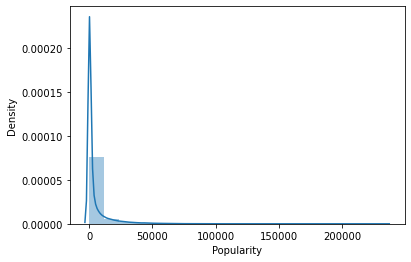

In [31]:
#popularity distribution
sns.distplot(df_2['Popularity'], bins=20)

In [32]:
df_2[df_2['Popularity'] < 10000]

,NAME,ORGN_NAME,geometry,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,...,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster,_merge
2,austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",https://open.spotify.com/track/5xhJmd0I15jFcEd...,404.00,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,...,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,english speaking and nordic,both
3,austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",https://open.spotify.com/track/0wJJhRgdHhT93Z3...,79.20,hymn,Kesha,single,dance pop,5910376.0,...,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,english speaking and nordic,both
4,austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",https://open.spotify.com/track/6JSryEdVJTZq6YB...,102.85,arrows,Foo Fighters,album,alternative metal,8092392.0,...,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,english speaking and nordic,both
5,austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",https://open.spotify.com/track/7nAfXgeHfDO50up...,1303.95,talking to myself,Linkin Park,album,alternative metal,17132813.0,...,0.0,0.0,0.0,0.0,0.0,66.0,0.0,0.0,english speaking and nordic,both
7,austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",https://open.spotify.com/track/4lTiuD1DwBKo4L7...,2.40,japan,Famous Dex,single,chicago rap,2039736.0,...,0.0,0.0,0.0,0.0,0.0,198.0,0.0,0.0,english speaking and nordic,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93539,turkey,Türkiye,"MULTIPOLYGON (((29.11932 40.83066, 29.11734 40...",https://open.spotify.com/track/6IYfi7SufZ6k02U...,45.60,shadows,Tinie Tempah - Bipolar Sunshine,album,dance pop,734985.0,...,0.0,0.0,1.0,0.0,0.0,144.0,0.0,0.0,southern europe and portuguese heritage,both
93540,turkey,Türkiye,"MULTIPOLYGON (((29.11932 40.83066, 29.11734 40...",https://open.spotify.com/track/5evWFJpbKC8QN6P...,247.40,tarumar,Şam,single,turkish hip hop,108479.0,...,0.0,0.0,1.0,0.0,0.0,36.0,0.0,1.0,southern europe and portuguese heritage,both
93541,turkey,Türkiye,"MULTIPOLYGON (((29.11932 40.83066, 29.11734 40...",https://open.spotify.com/track/6KJaFzgieN31wbM...,365.85,çirkin ördekler,Cash Flow,album,turkish hip hop,124767.0,...,0.0,0.0,1.0,0.0,0.0,74.0,0.0,0.0,southern europe and portuguese heritage,both
93542,turkey,Türkiye,"MULTIPOLYGON (((29.11932 40.83066, 29.11734 40...",https://open.spotify.com/track/03Qa4yCUzzXK5Rt...,589.60,bir elmanın yarısı,Mehmet Erdem,album,turkish jazz,481608.0,...,0.0,0.0,1.0,0.0,0.0,156.0,0.0,0.0,southern europe and portuguese heritage,both


In [33]:
#Dropping the _merge column
df_2.drop(columns='_merge', inplace = True)

/Users/Nicole/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
Drake = df_2[df_2.Artist =='Drake']

In [35]:
Drake

,NAME,ORGN_NAME,geometry,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
48,austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",https://open.spotify.com/track/3jipFRgLyKK0oJo...,236.00,jaded,Drake,album,canadian hip hop,50593376.0,...,0.0,0.0,0.0,0.0,0.0,0.0,108.0,0.0,0.0,english speaking and nordic
102,austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",https://open.spotify.com/track/5goGDc74vVREyN8...,520.55,diplomatic immunity,Drake,single,canadian hip hop,50593376.0,...,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0,0.0,english speaking and nordic
181,austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",https://open.spotify.com/track/2Na0z2gfN67Rzf0...,394.10,lose you,Drake,album,canadian hip hop,50593376.0,...,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0,0.0,english speaking and nordic
212,austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",https://open.spotify.com/track/6DCZcSspjsKoFjz...,9471.55,gods plan,Drake,album,canadian hip hop,50593376.0,...,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,english speaking and nordic
257,austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",https://open.spotify.com/track/7txPE73wHbuXYkM...,1060.80,mob ties,Drake,album,canadian hip hop,50593376.0,...,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,english speaking and nordic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91212,turkey,Türkiye,"MULTIPOLYGON (((29.11932 40.83066, 29.11734 40...",https://open.spotify.com/track/2G7V7zsVDxg1yRs...,35862.35,in my feelings,Drake,album,canadian hip hop,50593376,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,southern europe and portuguese heritage
91265,turkey,Türkiye,"MULTIPOLYGON (((29.11932 40.83066, 29.11734 40...",https://open.spotify.com/track/76gUmNLXGQVOsGh...,89.60,madiba riddim,Drake,album,canadian hip hop,50593376,...,0.0,0.0,0.0,1.0,0.0,0.0,150.0,0.0,0.0,southern europe and portuguese heritage
91345,turkey,Türkiye,"MULTIPOLYGON (((29.11932 40.83066, 29.11734 40...",https://open.spotify.com/track/4uloft7ZE54Wfls...,221.25,elevate,Drake,album,canadian hip hop,50593376,...,0.0,0.0,0.0,1.0,0.0,0.0,64.0,0.0,0.0,southern europe and portuguese heritage
91350,turkey,Türkiye,"MULTIPOLYGON (((29.11932 40.83066, 29.11734 40...",https://open.spotify.com/track/13e6f8t7RKXuxZ0...,64.80,jorja interlude,Drake,album,canadian hip hop,50593376,...,0.0,0.0,0.0,1.0,0.0,0.0,173.0,0.0,0.0,southern europe and portuguese heritage


/Users/Nicole/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Popularity', ylabel='Density'>

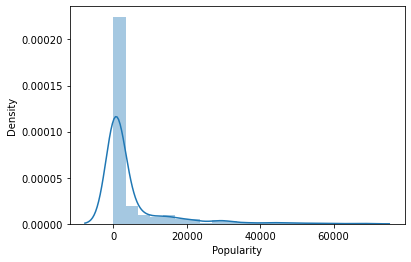

In [36]:
#Checking Dua Lipa's chart ranking distribution
sns.distplot(Drake['Popularity'], bins=20)

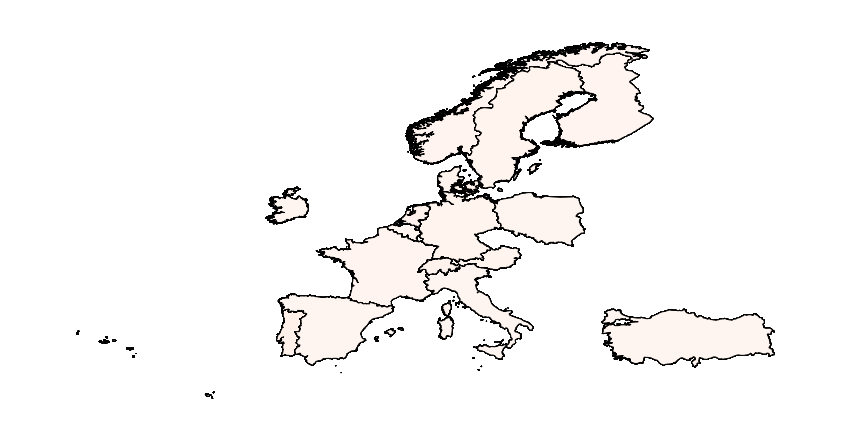

In [37]:
gp = gplt.choropleth(
    Drake, hue = Drake['Popularity'], scheme = None,
    cmap='Reds', figsize=(15,15)
)

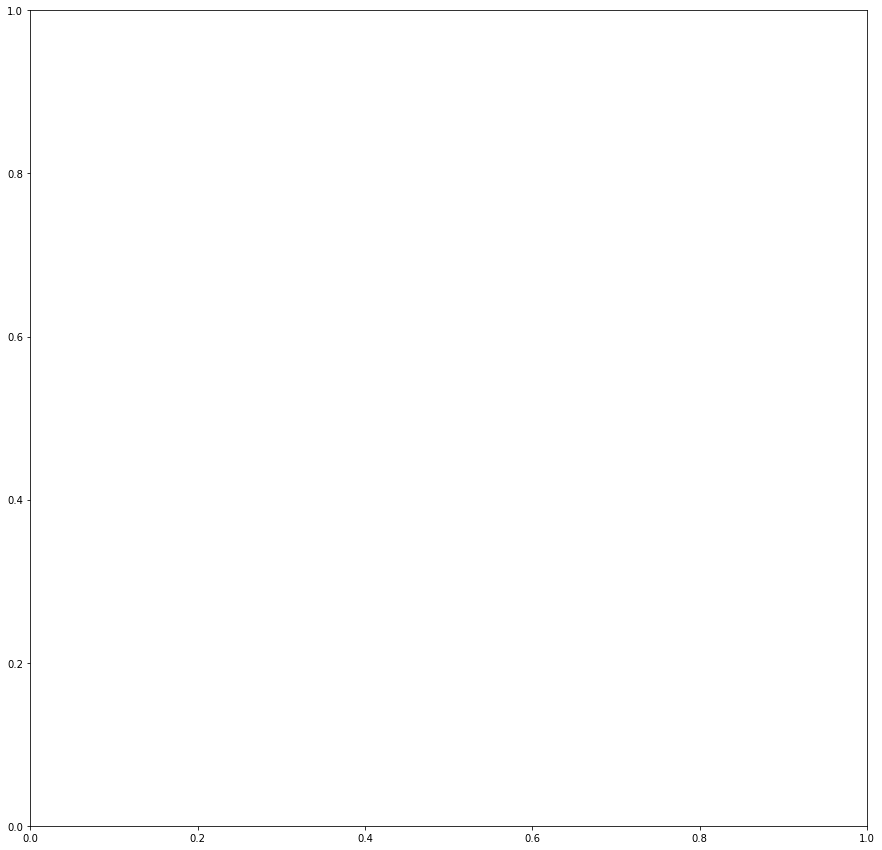

In [38]:
# Create a subplot with `fig` and `ax`.
fig, ax = plt.subplots(1, figsize=(15, 15))

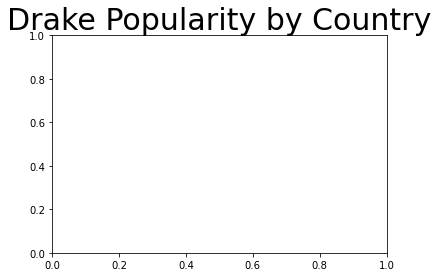

In [39]:
plt.title('Drake Popularity by Country', size=30)
tl = Drake.plot(column='Popularity',
cmap='Greens',      # Color map for the states                     
             linewidth=0.6,      # Line width for country borders
             ax=ax,              # Plotting the map on `ax`
             edgecolor='black'); # Country border colors

In [40]:
c_bar_colors = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=Drake['Popularity'].min(), vmax=Drake['Popularity'].max()))

# Plot the colorbar.
color_bar = fig.colorbar(c_bar_colors)

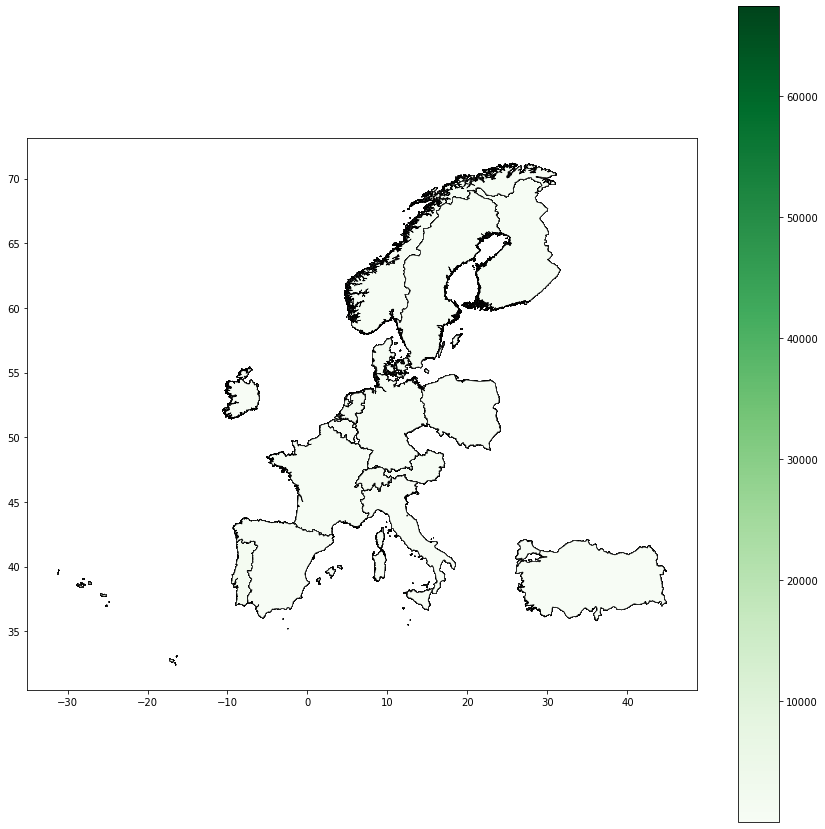

In [41]:
tl.figure

In [42]:
Eminem = df_2[df_2.Artist =='Eminem']

In [43]:
Eminem

,NAME,ORGN_NAME,geometry,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
74,austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",https://open.spotify.com/track/4qNWEOMyexn7b8I...,234.40,little engine,Eminem,album,detroit hip hop,39078037.0,...,0.0,0.0,0.0,0.0,0.0,0.0,108.0,0.0,0.0,english speaking and nordic
172,austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",https://open.spotify.com/track/5SiZJoLXp3WOl3J...,1642.50,darkness,Eminem,album,detroit hip hop,39078037.0,...,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,1.0,english speaking and nordic
189,austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",https://open.spotify.com/track/6sDQ4uiWw9OdVrC...,32.00,rap god,Eminem,album,detroit hip hop,39078037.0,...,0.0,0.0,0.0,0.0,0.0,0.0,177.0,0.0,0.0,english speaking and nordic
427,austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",https://open.spotify.com/track/72i5s3SBDEkaRUO...,191.20,in your head,Eminem,album,detroit hip hop,39078037.0,...,0.0,0.0,0.0,0.0,0.0,0.0,123.0,0.0,0.0,english speaking and nordic
560,austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",https://open.spotify.com/track/4EmunTy7kNBYQiv...,219.90,alfred - interlude,Eminem,album,detroit hip hop,39078037.0,...,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,english speaking and nordic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91138,turkey,Türkiye,"MULTIPOLYGON (((29.11932 40.83066, 29.11734 40...",https://open.spotify.com/track/0OMt4Qyetdbw2eU...,291.15,remind me,Eminem,album,detroit hip hop,39078037,...,0.0,0.0,0.0,1.0,0.0,0.0,73.0,0.0,0.0,southern europe and portuguese heritage
91262,turkey,Türkiye,"MULTIPOLYGON (((29.11932 40.83066, 29.11734 40...",https://open.spotify.com/track/4U6BNYzKPDiMzDq...,110.50,untouchable,Eminem,single,detroit hip hop,39078037,...,0.0,0.0,0.0,1.0,0.0,0.0,71.0,0.0,0.0,southern europe and portuguese heritage
91266,turkey,Türkiye,"MULTIPOLYGON (((29.11932 40.83066, 29.11734 40...",https://open.spotify.com/track/34d7sGX6WUqq8f0...,11.20,marsh,Eminem,album,detroit hip hop,39078037,...,0.0,0.0,0.0,1.0,0.0,0.0,187.0,0.0,0.0,southern europe and portuguese heritage
91281,turkey,Türkiye,"MULTIPOLYGON (((29.11932 40.83066, 29.11734 40...",https://open.spotify.com/track/2XTquzYQAdT1Hk7...,1757.45,greatest,Eminem,album,detroit hip hop,39078037,...,0.0,0.0,0.0,1.0,0.0,0.0,45.0,0.0,1.0,southern europe and portuguese heritage


/Users/Nicole/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Popularity', ylabel='Density'>

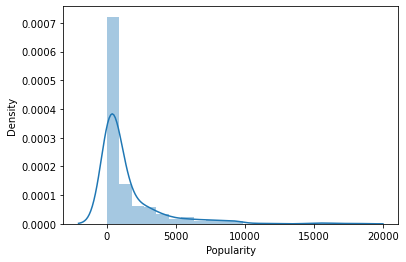

In [44]:
#Checking Dua Lipa's chart ranking distribution
sns.distplot(Eminem['Popularity'], bins=20)

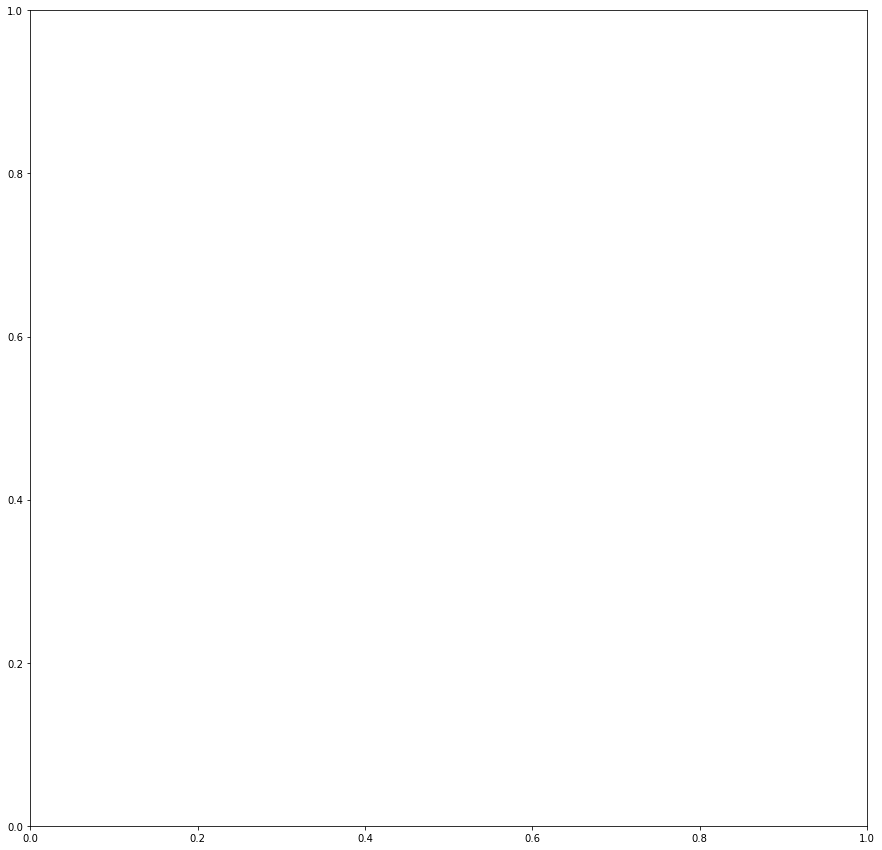

In [45]:
# Create a subplot with `fig` and `ax`.
fig, ax = plt.subplots(1, figsize=(15, 15))

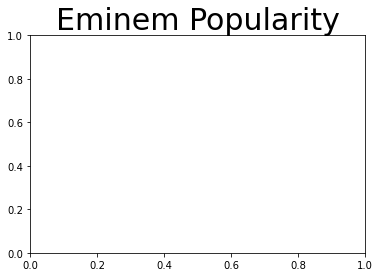

In [46]:
plt.title('Eminem Popularity', size=30)
tl_2 = Eminem.plot(column='Popularity',
cmap='Blues',      # Color map for the states                     
             linewidth=0.6,      # Line width for country borders
             ax=ax,              # Plotting the map on `ax`
             edgecolor='black'); # Country border colors

In [47]:
c_bar_colors = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=Eminem['Popularity'].min(), vmax=Eminem['Popularity'].max()))

# Plot the colorbar.
color_bar = fig.colorbar(c_bar_colors)

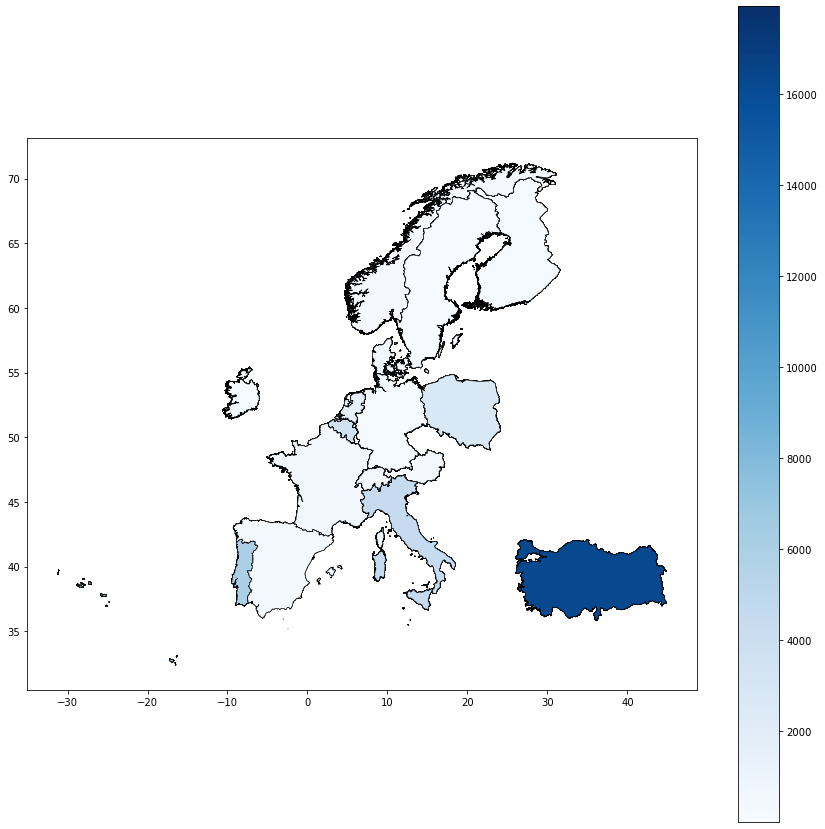

In [48]:
tl_2.figure

Discuss the results

Eminem seems to be more popular than Drake in some countries and Drake across the board is consistently popular. 

Does the analysis answer any of your existing research questions?
Seems like there are similar artist that are popular across Europe's countries, Drake being one of them and have consistent amount of popularity across countries as well.

Does the analysis lead you to any new research questions?
It makes me interested in looking more into the genres seeing that they are similar across countries as well or different. Drake and Eminem are different genres so I am wondering if there is a specific genre that is more popular than others. 


In [49]:
df_2.to_pickle(r'/Volumes/2020-2021/CareerFoundry/Data Analytics Program/Achievement 6 Immersion/6 Immersion Project/02 Data/Prepared Data/Final_Spotify_database_cleaned_geo.pkl')